# Convolutional Autoencoder
- Convolutional autoencoders using convolutional & pooling layers can be generated as well
- Fundamentals are identical; just replace dense layers with convolutional layers!

<br>

<img src="https://camo.githubusercontent.com/c2b4e51b1ebacac0d5fae4796bff2572797cc385/687474703a2f2f6d692e656e672e63616d2e61632e756b2f70726f6a656374732f7365676e65742f696d616765732f7365676e65742e706e67" style="width: 800px"/>

In [13]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn import datasets
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

### Load Dataset
- Digits dataset in sklearn

In [2]:
data = datasets.load_digits()

In [3]:
X_data = data.images
y_data = data.target

In [4]:
# fit in data instances into interval [0,1]
X_data = X_data / 16.

In [7]:
X_data = X_data.reshape(X_data.shape[0], X_data.shape[1], X_data.shape[2], 1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 777)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1257, 8, 8, 1)
(540, 8, 8, 1)
(1257,)
(540,)


### Creating convolutional autoencoder

In [34]:
inputs = Input(shape = (8,8,1))
print(inputs)

Tensor("input_4:0", shape=(?, 8, 8, 1), dtype=float32)


In [35]:
code = Conv2D(5, (3, 3), activation='relu', padding='same')(inputs)
code = MaxPooling2D((2,2), padding = 'same')(code)
print(code.shape)

(?, 4, 4, 5)


In [36]:
# in order to "decode" the code representations, upsampling methods can be used
decoded = Conv2D(5, (3,3), activation = 'relu', padding = 'same')(code)
decoded = UpSampling2D((2,2))(decoded)    
print(decoded.shape)

(?, 8, 8, 5)


In [37]:
# note that output shape should be identical to the input shape
outputs = Conv2D(1, (3, 3), activation = 'sigmoid', padding = 'same')(decoded)    
print(outputs.shape)

(?, 8, 8, 1)


In [38]:
auto_encoder = Model(inputs = inputs, outputs = outputs)
auto_encoder.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [39]:
auto_encoder.fit(X_train, X_train, epochs = 1000, verbose = 0)

In [40]:
decoded = auto_encoder.predict(X_test)

### Visualizing results

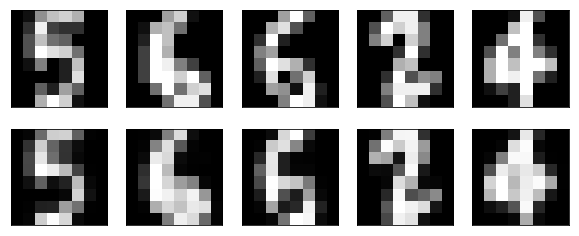

In [42]:
n = 5
plt.figure(figsize=(10, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(X_test[i].reshape(8, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(decoded[i].reshape(8, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()